# <div style="text-align: right"> FIT1043 Introduction to Data Science </div> <div style="text-align: right"> Assignment 1 </div>
<div style="text-align: right"> Name : Ooi Yu Zhang </div> <div style="text-align: right"> Student ID : 32713339 </div> <div style="text-align: right"> 1<sup>st</sup> April 2022 </div>
_______________________________________________________________________________________________________________________________


# Introduction  


The way I will be approaching the assignment is to first have a thorough look at the data, both in the csv files and in jupyter notebook. I will be cleaning up the data as frequent as possible to make sure that the data is always easily readable, this way I can locate, fix and solve problems more efficiently.
_______________________________________________________________________________________________________________________________

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

_______________________________________________________________________________________________________________________________

## Reading The Files

In [2]:
led_df = pd.read_csv('data/LifeExpectancyData-v2.csv')
gdp_df = pd.read_csv('data/2019-GDP.csv')
population_df = pd.read_csv('data/2020-Population.csv')

_______________________________________________________________________________________________________________________________

## Wrangling The Data

### Wrangling data from Life Expectancy Data

#### Checking what the data looks like

In [3]:
led_df

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,27,723.0,27.1,4.36,68.0,31,67.0,65.0,33.6,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,26,715.0,26.7,4.06,7.0,998,7.0,68.0,36.7,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,25,73.0,26.3,4.43,73.0,304,73.0,71.0,39.8,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,25,686.0,25.9,1.72,76.0,529,76.0,75.0,42.1,0.427,9.8


In [4]:
led_df.head()

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5


#### Checking the dimensions of the data

In [5]:
led_df.shape

(2938, 15)

#### Checking how the column headers are stored

In [6]:
led_df.columns

Index(['country', 'Year', 'Status', 'Life expectancy ', 'infant deaths',
       'Adult Mortality', ' BMI ', 'Alcohol consumption', 'Hepatitis B',
       'Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Checking for null values in the data

In [7]:
led_df.info

<bound method DataFrame.info of           country  Year      Status  Life expectancy   infant deaths  \
0     Afghanistan  2015  Developing              65.0             62   
1     Afghanistan  2014  Developing              59.9             64   
2     Afghanistan  2013  Developing              59.9             66   
3     Afghanistan  2012  Developing              59.5             69   
4     Afghanistan  2011  Developing              59.2             71   
...           ...   ...         ...               ...            ...   
2933     Zimbabwe  2004  Developing              44.3             27   
2934     Zimbabwe  2003  Developing              44.5             26   
2935     Zimbabwe  2002  Developing              44.8             25   
2936     Zimbabwe  2001  Developing              45.3             25   
2937     Zimbabwe  2000  Developing              46.0             24   

      Adult Mortality   BMI   Alcohol consumption  Hepatitis B  Measles   \
0               263.0   19.

#### Renaming the column headers (Making the column headers look tidier and removing whitespace from some of the column headers)

In [8]:
led_df.rename(
    columns={
        'country':'Country',
        'Life expectancy ':'Life Expectancy',
        'infant deaths':'Infant Deaths',
        ' BMI ':'BMI',
        'Alcohol consumption':'Alcohol Consumption',
        'Measles ':'Measles',
        'Diphtheria ':' HIV/AIDS',
        'Income composition of resources':'Income Composition of Resources'
    }, inplace=True
)

#### Verifying the change in column headers

In [9]:
led_df.head()

,Country,Year,Status,Life Expectancy,Infant Deaths,Adult Mortality,BMI,Alcohol Consumption,Hepatitis B,Measles,Polio,HIV/AIDS,HIV/AIDS,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5


#### Getting the list of all countries in the data

In [10]:
led_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

#### Saving all South East Asian countries into a list
Explanation: I have chosen list as the data structure to store the countries into, this is because lists are mutable and easy to manipulate in case I need to modify it in the future.

In [11]:
sea_countries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Philippines', 'Lao People\'s Democratic Republic', 'Malaysia', 
                 'Myanmar', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']

#### Filtering the data to only contain data from South East Asian countries and verifying the change

In [12]:
sealed_df = led_df[led_df['Country'].isin(sea_countries)]
sealed_df

,Country,Year,Status,Life Expectancy,Infant Deaths,Adult Mortality,BMI,Alcohol Consumption,Hepatitis B,Measles,Polio,HIV/AIDS,HIV/AIDS,Income Composition of Resources,Schooling
368,Brunei Darussalam,2015,Developing,77.7,0,78.0,41.2,NaN,99.0,4,99.0,99.0,0.1,0.864,14.9
369,Brunei Darussalam,2014,Developing,77.6,0,8.0,4.2,0.01,99.0,1,99.0,99.0,0.1,0.863,15.0
370,Brunei Darussalam,2013,Developing,77.1,0,84.0,39.2,0.01,98.0,0,99.0,99.0,0.1,0.860,14.9
371,Brunei Darussalam,2012,Developing,78.3,0,79.0,38.2,0.01,99.0,1,99.0,99.0,0.1,0.852,14.4
372,Brunei Darussalam,2011,Developing,77.4,0,79.0,37.2,0.97,93.0,4,99.0,97.0,0.1,0.846,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,29,136.0,1.9,2.86,94.0,217,96.0,96.0,0.2,0.601,11.0
2886,Viet Nam,2003,Developing,74.0,30,137.0,1.4,2.19,78.0,2297,96.0,99.0,0.2,0.592,10.9
2887,Viet Nam,2002,Developing,73.8,30,137.0,1.0,2.03,NaN,6755,92.0,75.0,0.2,0.584,10.7
2888,Viet Nam,2001,Developing,73.6,32,138.0,9.6,1.84,NaN,12058,96.0,96.0,0.1,0.576,10.6


#### Creating a copy of the 'Life Expectancy' column for a different aggregation function

In [13]:
sealed_df = sealed_df.assign(LED=sealed_df['Life Expectancy'])
sealed_df

,Country,Year,Status,Life Expectancy,Infant Deaths,Adult Mortality,BMI,Alcohol Consumption,Hepatitis B,Measles,Polio,HIV/AIDS,HIV/AIDS,Income Composition of Resources,Schooling,LED
368,Brunei Darussalam,2015,Developing,77.7,0,78.0,41.2,NaN,99.0,4,99.0,99.0,0.1,0.864,14.9,77.7
369,Brunei Darussalam,2014,Developing,77.6,0,8.0,4.2,0.01,99.0,1,99.0,99.0,0.1,0.863,15.0,77.6
370,Brunei Darussalam,2013,Developing,77.1,0,84.0,39.2,0.01,98.0,0,99.0,99.0,0.1,0.860,14.9,77.1
371,Brunei Darussalam,2012,Developing,78.3,0,79.0,38.2,0.01,99.0,1,99.0,99.0,0.1,0.852,14.4,78.3
372,Brunei Darussalam,2011,Developing,77.4,0,79.0,37.2,0.97,93.0,4,99.0,97.0,0.1,0.846,14.1,77.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Viet Nam,2004,Developing,74.2,29,136.0,1.9,2.86,94.0,217,96.0,96.0,0.2,0.601,11.0,74.2
2886,Viet Nam,2003,Developing,74.0,30,137.0,1.4,2.19,78.0,2297,96.0,99.0,0.2,0.592,10.9,74.0
2887,Viet Nam,2002,Developing,73.8,30,137.0,1.0,2.03,NaN,6755,92.0,75.0,0.2,0.584,10.7,73.8
2888,Viet Nam,2001,Developing,73.6,32,138.0,9.6,1.84,NaN,12058,96.0,96.0,0.1,0.576,10.6,73.6


#### Grouping the dataframe by country and status 

In [14]:
seastatus_df = sealed_df.groupby(['Country','Status'])

#### Using the grouped dataframe to perform aggregation on the required columns

In [15]:
seaagg_df = seastatus_df.agg({
    'Life Expectancy':'max',
    'Adult Mortality':'sum',
    'BMI':'mean', 
    'Income Composition of Resources':'mean', 
    'Schooling':'mean',
    'LED':'mean'
})
seaagg_df.reset_index(inplace=True)
seaagg_df

,Country,Status,Life Expectancy,Adult Mortality,BMI,Income Composition of Resources,Schooling,LED
0,Brunei Darussalam,Developing,78.3,1073.0,29.71875,0.839375,14.10625,76.48750
1,Cambodia,Developing,68.7,3142.0,15.36250,0.491937,9.87500,64.34375
2,Indonesia,Developing,69.1,2665.0,19.95625,0.641437,11.61250,67.55625
3,Lao People's Democratic Republic,Developing,65.7,3155.0,14.36250,0.515625,9.23125,62.38125
4,Malaysia,Developing,75.0,1897.0,29.16875,0.749125,12.56250,73.75625
5,Myanmar,Developing,66.6,2469.0,17.12500,0.488250,8.32500,64.20000
6,Philippines,Developing,68.5,3487.0,19.18750,0.650438,11.54375,67.57500
7,Singapore,Developed,87.0,992.0,25.90625,0.866875,13.98125,81.47500
8,Thailand,Developing,74.9,2566.0,21.59375,0.694688,12.55000,73.08125
9,Timor-Leste,Developing,68.3,2726.0,14.55000,0.517625,10.70000,64.75625


#### Renaming the column headers for the aggregated dataframe

In [16]:
seaagg_df.rename(
    columns = {
        'Life Expectancy':'Max Life Expectancy',
        'BMI':'Mean BMI', 
        'Income Composition of Resources':'Mean Income Composition of Resources', 
        'Schooling':'Mean Schooling', 
        'LED':'Mean Life Expectancy'
    }, inplace=True
)
seaagg_df

,Country,Status,Max Life Expectancy,Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling,Mean Life Expectancy
0,Brunei Darussalam,Developing,78.3,1073.0,29.71875,0.839375,14.10625,76.48750
1,Cambodia,Developing,68.7,3142.0,15.36250,0.491937,9.87500,64.34375
2,Indonesia,Developing,69.1,2665.0,19.95625,0.641437,11.61250,67.55625
3,Lao People's Democratic Republic,Developing,65.7,3155.0,14.36250,0.515625,9.23125,62.38125
4,Malaysia,Developing,75.0,1897.0,29.16875,0.749125,12.56250,73.75625
5,Myanmar,Developing,66.6,2469.0,17.12500,0.488250,8.32500,64.20000
6,Philippines,Developing,68.5,3487.0,19.18750,0.650438,11.54375,67.57500
7,Singapore,Developed,87.0,992.0,25.90625,0.866875,13.98125,81.47500
8,Thailand,Developing,74.9,2566.0,21.59375,0.694688,12.55000,73.08125
9,Timor-Leste,Developing,68.3,2726.0,14.55000,0.517625,10.70000,64.75625


### Wrangling data from GDP

#### Checking what the data looks like

In [17]:
gdp_df

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
...,...,...,...,...,...,...
239,NaN,.. Not available.,NaN,NaN,NaN,NaN
240,NaN,Note: Rankings include only those economies wi...,NaN,NaN,NaN,NaN
241,NaN,a. Based on data from official statistics of U...,NaN,NaN,NaN,NaN
242,NaN,GDP data source: http://data.worldbank.org/dat...,NaN,NaN,NaN,NaN


In [18]:
gdp_df.head()

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN


#### Rereading the file for GDP
Explanation: After looking inside the CSV file, 2019-GDP.csv, I have come to the conclusion that the words in row 2 are supposed to be the actual column headers.

In [19]:
gdp_df = pd.read_csv('data/2019-GDP.csv', skiprows=3)
gdp_df

,Unnamed: 0,Ranking,Unnamed: 2,Economy,US dollars),Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,1,NaN,United States,"21,427,700",NaN
2,CHN,2,NaN,China,"14,342,903",NaN
3,JPN,3,NaN,Japan,"5,081,770",NaN
4,DEU,4,NaN,Germany,"3,845,630",NaN
...,...,...,...,...,...,...
236,NaN,.. Not available.,NaN,NaN,NaN,NaN
237,NaN,Note: Rankings include only those economies wi...,NaN,NaN,NaN,NaN
238,NaN,a. Based on data from official statistics of U...,NaN,NaN,NaN,NaN
239,NaN,GDP data source: http://data.worldbank.org/dat...,NaN,NaN,NaN,NaN


#### Checking the dimensions of the data

In [20]:
gdp_df.shape

(241, 6)

#### Checking how the column headers are stored

In [21]:
gdp_df.columns

Index(['Unnamed: 0', 'Ranking', 'Unnamed: 2', 'Economy', 'US dollars)',
       'Unnamed: 5'],
      dtype='object')

#### Checking for null values in the data

In [22]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   229 non-null    object 
 1   Ranking      208 non-null    object 
 2   Unnamed: 2   0 non-null      float64
 3   Economy      229 non-null    object 
 4   US dollars)  229 non-null    object 
 5   Unnamed: 5   8 non-null      object 
dtypes: float64(1), object(5)
memory usage: 11.4+ KB


#### Retaining the useful columns by dropping the unused ones, and removing the None values
Explanation: After thoroughly reading through the assignment specifications, I've decided to only retain columns 3 and 4 as those will only be used for the rest of the assignment.

In [23]:
newgdp_df = gdp_df[['Economy','US dollars)']][~gdp_df['Economy'].isna() & ~gdp_df['US dollars)'].isna()]
newgdp_df

,Economy,US dollars)
1,United States,"21,427,700"
2,China,"14,342,903"
3,Japan,"5,081,770"
4,Germany,"3,845,630"
5,India,"2,875,142"
...,...,...
230,Sub-Saharan Africa,"1,755,011"
231,Low income,"521,274"
232,Lower middle income,"6,341,105"
233,Upper middle income,"25,817,130"


#### Appropriately renaming the column headers

In [24]:
newgdp_df.rename(columns={
    'Economy':'Country',
    'US dollars)':'GDP'
}, inplace=True)
newgdp_df

,Country,GDP
1,United States,"21,427,700"
2,China,"14,342,903"
3,Japan,"5,081,770"
4,Germany,"3,845,630"
5,India,"2,875,142"
...,...,...
230,Sub-Saharan Africa,"1,755,011"
231,Low income,"521,274"
232,Lower middle income,"6,341,105"
233,Upper middle income,"25,817,130"


#### Checking the naming conventions for the countries in the column Country

In [25]:
newgdp_df['Country'].unique()

array(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada',
       'Russian Federation', 'Korea, Rep.', 'Spain', 'Australia',
       'Mexico', 'Indonesia', 'Netherlands', 'Saudi Arabia', 'Turkey',
       'Switzerland', 'Poland', 'Thailand', 'Sweden', 'Belgium',
       'Argentina', 'Nigeria', 'Austria', 'Iran, Islamic Rep.',
       'United Arab Emirates', 'Norway', 'Israel', 'Ireland',
       'Philippines', 'Singapore', 'Hong Kong SAR, China', 'Malaysia',
       'South Africa', 'Denmark', 'Colombia', 'Egypt, Arab Rep.',
       'Bangladesh', 'Chile', 'Pakistan', 'Finland', 'Vietnam', 'Romania',
       'Czech Republic', 'Portugal', 'Iraq', 'Peru', 'Greece',
       'New Zealand', 'Qatar', 'Kazakhstan', 'Algeria', 'Hungary',
       'Ukraine', 'Kuwait', 'Morocco', 'Ecuador', 'Slovak Republic',
       'Puerto Rico', 'Cuba', 'Ethiopia', 'Kenya', 'Angola',
       'Dominican Republic', 'Sri Lanka', 'Oman', 'Guatemala', 'Myanmar',


#### Changing the names for two countries to match the ones in the Life Expectancy dataframe
Explanation: After looking through the data for all countries, I've found that the naming convention for Vietnam and Lao PDR here is different from the one in the Life Expectancy dataframe (Viet Nam and Lao People's Democratic Republic)

In [26]:
newgdp_df.loc[newgdp_df['Country']=='Vietnam','Country'] = 'Viet Nam'
newgdp_df.loc[newgdp_df['Country']=='Lao PDR','Country'] = "Lao People's Democratic Republic"

#### Checking if the names were changed properly

In [27]:
newgdp_df['Country'].unique()

array(['United States', 'China', 'Japan', 'Germany', 'India',
       'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada',
       'Russian Federation', 'Korea, Rep.', 'Spain', 'Australia',
       'Mexico', 'Indonesia', 'Netherlands', 'Saudi Arabia', 'Turkey',
       'Switzerland', 'Poland', 'Thailand', 'Sweden', 'Belgium',
       'Argentina', 'Nigeria', 'Austria', 'Iran, Islamic Rep.',
       'United Arab Emirates', 'Norway', 'Israel', 'Ireland',
       'Philippines', 'Singapore', 'Hong Kong SAR, China', 'Malaysia',
       'South Africa', 'Denmark', 'Colombia', 'Egypt, Arab Rep.',
       'Bangladesh', 'Chile', 'Pakistan', 'Finland', 'Viet Nam',
       'Romania', 'Czech Republic', 'Portugal', 'Iraq', 'Peru', 'Greece',
       'New Zealand', 'Qatar', 'Kazakhstan', 'Algeria', 'Hungary',
       'Ukraine', 'Kuwait', 'Morocco', 'Ecuador', 'Slovak Republic',
       'Puerto Rico', 'Cuba', 'Ethiopia', 'Kenya', 'Angola',
       'Dominican Republic', 'Sri Lanka', 'Oman', 'Guatemala', 'Myanmar',

#### Filtering the data to only contain data from South East Asian countries and verifying the change

In [28]:
seagdp_df = newgdp_df[newgdp_df['Country'].isin(sea_countries)]
seagdp_df.reset_index(inplace=True)
seagdp_df

,index,Country,GDP
0,16,Indonesia,"1,119,191"
1,22,Thailand,"543,650"
2,33,Philippines,"376,796"
3,34,Singapore,"372,063"
4,36,Malaysia,"364,702"
5,45,Viet Nam,"261,921"
6,71,Myanmar,"76,086"
7,103,Cambodia,"27,089"
8,117,Lao People's Democratic Republic,"18,174"
9,133,Brunei Darussalam,"13,469"


### Wrangling data from Population

#### Checking what the data looks like

In [29]:
population_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
301,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
302,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
303,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6


In [30]:
population_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Rereading the file for Population
Explanation: After looking through the CSV file 2020-Population.csv, I found that the actual data that would be used in the assignment begins from row 17

In [31]:
popu_df = pd.read_csv('data/2020-Population.csv', skiprows=16)
popu_df

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
285,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
286,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6


In [32]:
popu_df.shape

(289, 78)

In [33]:
popu_df.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Country code', 'Type', 'Parent code', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'],
      dtype='object')

In [34]:
popu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index                                 289 non-null    int64 
 1   Variant                               289 non-null    object
 2   Region, subregion, country or area *  289 non-null    object
 3   Notes                                 82 non-null     object
 4   Country code                          289 non-null    int64 
 5   Type                                  289 non-null    object
 6   Parent code                           289 non-null    int64 
 7   1950                                  289 non-null    object
 8   1951                                  289 non-null    object
 9   1952                                  289 non-null    object
 10  1953                                  289 non-null    object
 11  1954                            

#### Renaming the column header 'Region, subregion, country or area * '
Explanation: This is because the column mostly contains countries

In [35]:
popu_df.rename(columns={
    'Region, subregion, country or area *':'Country'
}, inplace=True)
popu_df

,Index,Variant,Country,Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
285,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
286,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6


#### Checking the naming conventions for the countries in the column Country

In [36]:
popu_df['Country'].unique()

array(['WORLD', 'UN development groups', 'More developed regions',
       'Less developed regions', 'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'World Bank income groups', 'High-income countries',
       'Middle-income countries', 'Upper-middle-income countries',
       'Lower-middle-income countries', 'Low-income countries',
       'No income group available', 'Geographic regions', 'Africa',
       'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania',
       'Sustainable Development Goal (SDG) regions', 'SUB-SAHARAN AFRICA',
       'Eastern Africa', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea',
       'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius',
       'Mayotte', 'Mozambique', 'Réunion', 'Rwanda', 'Seychelles',
       'Somalia', '

#### Filtering the data to only contain data from South East Asian countries and verifying the change

In [37]:
seapopu_df = popu_df[popu_df['Country'].isin(sea_countries)]
seapopu_df.reset_index(inplace=True)
seapopu_df

,index,Index,Variant,Country,Notes,Country code,Type,Parent code,1950,1951,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,136,137,Estimates,Brunei Darussalam,NaN,96,Country/Area,920,48,51,...,394,399,404,410,415,420,424,429,433,437
1,137,138,Estimates,Cambodia,NaN,116,Country/Area,920,4 433,4 538,...,14 541,14 780,15 026,15 275,15 521,15 766,16 009,16 250,16 487,16 719
2,138,139,Estimates,Indonesia,NaN,360,Country/Area,920,69 543,70 849,...,245 116,248 452,251 805,255 128,258 383,261 556,264 651,267 671,270 626,273 524
3,139,140,Estimates,Lao People's Democratic Republic,NaN,418,Country/Area,920,1 683,1 723,...,6 348,6 445,6 541,6 640,6 741,6 846,6 953,7 061,7 169,7 276
4,140,141,Estimates,Malaysia,13,458,Country/Area,920,6 110,6 271,...,28 651,29 068,29 469,29 867,30 271,30 685,31 105,31 528,31 950,32 366
5,141,142,Estimates,Myanmar,NaN,104,Country/Area,920,17 780,18 104,...,50 991,51 414,51 852,52 281,52 681,53 045,53 383,53 708,54 045,54 410
6,142,143,Estimates,Philippines,NaN,608,Country/Area,920,18 580,19 247,...,95 570,97 213,98 872,100 513,102 113,103 664,105 173,106 651,108 117,109 581
7,143,144,Estimates,Singapore,NaN,702,Country/Area,920,1 022,1 068,...,5 264,5 369,5 454,5 526,5 592,5 654,5 708,5 758,5 804,5 850
8,144,145,Estimates,Thailand,NaN,764,Country/Area,920,20 710,21 263,...,67 518,67 836,68 145,68 439,68 715,68 971,69 210,69 428,69 626,69 800
9,145,146,Estimates,Timor-Leste,NaN,626,Country/Area,920,415,419,...,1 113,1 133,1 153,1 174,1 196,1 219,1 243,1 268,1 293,1 318


In [38]:
gdppopu_df = seagdp_df.merge(seapopu_df,on='Country')
gdppopu_df

,index_x,Country,GDP,index_y,Index,Variant,Notes,Country code,Type,Parent code,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,16,Indonesia,"1,119,191",138,139,Estimates,NaN,360,Country/Area,920,...,245 116,248 452,251 805,255 128,258 383,261 556,264 651,267 671,270 626,273 524
1,22,Thailand,"543,650",144,145,Estimates,NaN,764,Country/Area,920,...,67 518,67 836,68 145,68 439,68 715,68 971,69 210,69 428,69 626,69 800
2,33,Philippines,"376,796",142,143,Estimates,NaN,608,Country/Area,920,...,95 570,97 213,98 872,100 513,102 113,103 664,105 173,106 651,108 117,109 581
3,34,Singapore,"372,063",143,144,Estimates,NaN,702,Country/Area,920,...,5 264,5 369,5 454,5 526,5 592,5 654,5 708,5 758,5 804,5 850
4,36,Malaysia,"364,702",140,141,Estimates,13,458,Country/Area,920,...,28 651,29 068,29 469,29 867,30 271,30 685,31 105,31 528,31 950,32 366
5,45,Viet Nam,"261,921",146,147,Estimates,NaN,704,Country/Area,920,...,88 871,89 802,90 753,91 714,92 677,93 640,94 601,95 546,96 462,97 339
6,71,Myanmar,"76,086",141,142,Estimates,NaN,104,Country/Area,920,...,50 991,51 414,51 852,52 281,52 681,53 045,53 383,53 708,54 045,54 410
7,103,Cambodia,"27,089",137,138,Estimates,NaN,116,Country/Area,920,...,14 541,14 780,15 026,15 275,15 521,15 766,16 009,16 250,16 487,16 719
8,117,Lao People's Democratic Republic,"18,174",139,140,Estimates,NaN,418,Country/Area,920,...,6 348,6 445,6 541,6 640,6 741,6 846,6 953,7 061,7 169,7 276
9,133,Brunei Darussalam,"13,469",136,137,Estimates,NaN,96,Country/Area,920,...,394,399,404,410,415,420,424,429,433,437


#### Retaining the columns that will only be used later on in the assignment
Explanation: After thoroughly reading through the assignment specification and looking through the csv files, I've decided that only the following columns below will be needed.

In [39]:
gdppopu_df = gdppopu_df[['Country', 'GDP', '2019']]
gdppopu_df

,Country,GDP,2019
0,Indonesia,"1,119,191",270 626
1,Thailand,"543,650",69 626
2,Philippines,"376,796",108 117
3,Singapore,"372,063",5 804
4,Malaysia,"364,702",31 950
5,Viet Nam,"261,921",96 462
6,Myanmar,"76,086",54 045
7,Cambodia,"27,089",16 487
8,Lao People's Democratic Republic,"18,174",7 169
9,Brunei Darussalam,"13,469",433


#### Converting GDP to numerical form for usage in calculations
#### Removing the commas and whitespaces from the numbers

In [40]:
gdppopu_df = gdppopu_df.assign(**{
    'GDP':gdppopu_df['GDP'].apply(lambda x : x.replace(',','')),
    '2019':gdppopu_df['2019'].apply(lambda x : x.replace(' ',''))
})
gdppopu_df

,Country,GDP,2019
0,Indonesia,1119191,270626
1,Thailand,543650,69626
2,Philippines,376796,108117
3,Singapore,372063,5804
4,Malaysia,364702,31950
5,Viet Nam,261921,96462
6,Myanmar,76086,54045
7,Cambodia,27089,16487
8,Lao People's Democratic Republic,18174,7169
9,Brunei Darussalam,13469,433


#### Converting the numbers from String into int

In [41]:
gdppopu_df = gdppopu_df.assign(**{
    'GDP':gdppopu_df['GDP'].astype(int),
    '2019':gdppopu_df['2019'].astype(int)
})
gdppopu_df

,Country,GDP,2019
0,Indonesia,1119191,270626
1,Thailand,543650,69626
2,Philippines,376796,108117
3,Singapore,372063,5804
4,Malaysia,364702,31950
5,Viet Nam,261921,96462
6,Myanmar,76086,54045
7,Cambodia,27089,16487
8,Lao People's Democratic Republic,18174,7169
9,Brunei Darussalam,13469,433


#### Renaming the column '2019' to 'Population'

In [42]:
gdppopu_df.rename(columns={'2019':'Population'}, inplace=True)
gdppopu_df

,Country,GDP,Population
0,Indonesia,1119191,270626
1,Thailand,543650,69626
2,Philippines,376796,108117
3,Singapore,372063,5804
4,Malaysia,364702,31950
5,Viet Nam,261921,96462
6,Myanmar,76086,54045
7,Cambodia,27089,16487
8,Lao People's Democratic Republic,18174,7169
9,Brunei Darussalam,13469,433


#### Calculation for Per Capita GDP, by multiplying the population (in thousands) by 1000 for it to be equal to GDP (in millions)

In [43]:
gdppopu_df['PerCapitaGDP'] = gdppopu_df['GDP'] / gdppopu_df['Population'] * 1000
gdppopu_df

,Country,GDP,Population,PerCapitaGDP
0,Indonesia,1119191,270626,4135.563471
1,Thailand,543650,69626,7808.146382
2,Philippines,376796,108117,3485.076352
3,Singapore,372063,5804,64104.583046
4,Malaysia,364702,31950,11414.773083
5,Viet Nam,261921,96462,2715.276482
6,Myanmar,76086,54045,1407.826811
7,Cambodia,27089,16487,1643.052102
8,Lao People's Democratic Republic,18174,7169,2535.081601
9,Brunei Darussalam,13469,433,31106.235566


#### Merging all the dataframes together to form one complete dataframe

In [44]:
merged_df = seaagg_df.merge(gdppopu_df, on=['Country'])
merged_df

,Country,Status,Max Life Expectancy,Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling,Mean Life Expectancy,GDP,Population,PerCapitaGDP
0,Brunei Darussalam,Developing,78.3,1073.0,29.71875,0.839375,14.10625,76.48750,13469,433,31106.235566
1,Cambodia,Developing,68.7,3142.0,15.36250,0.491937,9.87500,64.34375,27089,16487,1643.052102
2,Indonesia,Developing,69.1,2665.0,19.95625,0.641437,11.61250,67.55625,1119191,270626,4135.563471
3,Lao People's Democratic Republic,Developing,65.7,3155.0,14.36250,0.515625,9.23125,62.38125,18174,7169,2535.081601
4,Malaysia,Developing,75.0,1897.0,29.16875,0.749125,12.56250,73.75625,364702,31950,11414.773083
5,Myanmar,Developing,66.6,2469.0,17.12500,0.488250,8.32500,64.20000,76086,54045,1407.826811
6,Philippines,Developing,68.5,3487.0,19.18750,0.650438,11.54375,67.57500,376796,108117,3485.076352
7,Singapore,Developed,87.0,992.0,25.90625,0.866875,13.98125,81.47500,372063,5804,64104.583046
8,Thailand,Developing,74.9,2566.0,21.59375,0.694688,12.55000,73.08125,543650,69626,7808.146382
9,Timor-Leste,Developing,68.3,2726.0,14.55000,0.517625,10.70000,64.75625,1674,1293,1294.663573


#### Generate descriptive statistics for the merged dataframe

In [45]:
merged_df.describe()

,Max Life Expectancy,Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling,Mean Life Expectancy,GDP,Population,PerCapitaGDP
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000
mean,72.554545,2381.545455,19.828977,0.643858,11.454545,70.035227,2.886195e+05,60182.909091,11968.207134
std,6.393804,815.123103,6.206451,0.134771,1.835239,6.190168,3.347960e+05,79711.374898,19344.372848
min,65.700000,992.000000,11.187500,0.488250,8.325000,62.381250,1.674000e+03,433.000000,1294.663573
25%,68.400000,1961.000000,14.956250,0.516625,10.287500,64.550000,2.263150e+04,6486.500000,2089.066851
50%,69.100000,2566.000000,19.187500,0.641437,11.543750,67.575000,2.619210e+05,31950.000000,3485.076352
75%,75.500000,2934.000000,23.750000,0.721906,12.556250,74.265625,3.744295e+05,83044.000000,9611.459733
max,87.000000,3487.000000,29.718750,0.866875,14.106250,81.475000,1.119191e+06,270626.000000,64104.583046


_______________________________________________________________________________________________________________________________
# Solving The Questions
_______________________________________________________________________________________________________________________________

## Question 1


#### Approach: Since we want to compare numerical data (Age) to categorical data (Status of Country), I have decided to use a vertical bar chart to visualise the data 

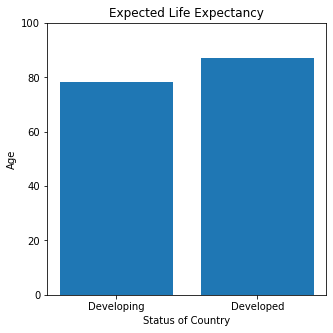

In [46]:
plt.figure(figsize=(5,5))
plt.bar(merged_df['Status'], merged_df['Max Life Expectancy'])
plt.title('Expected Life Expectancy')
plt.xlabel('Status of Country')
plt.ylabel('Age')
plt.ylim(0, 100)
plt.show()

From the bar chart, it can be concluded that the expected life expectancy in developed countries is greater than in developing countries.

This could be due to the health care provided by the government in the different countries

## Question 2


### Approach for first problem: 
#### Due to the big disparities in the numbers, I have decided to divide the data in the Adult Mortality column by 100 and divide the data in the Population column by 1000 so that the numbers are closer to the range of the data in the Mean Life Expectancy column
### Approach for second problem: 
#### In this case, since we will be comparing 3 instances of numerical data (Adult Mortality, Population and Mean Life Expectancy) to categorical data (Country), I've decided to use a stacked horizontal bar chart as I have found that the visualisation is most easy to understand this way as compared to using a basic bar graph. This is because attempting to visualise this data using a basic bar graph will result in a very messy and overly large bar graph

In [47]:
merged_df['Adult Mortality per 100'] = merged_df['Adult Mortality'] / 100
merged_df['Population per 1000'] = merged_df['Population'] / 1000
merged_df

,Country,Status,Max Life Expectancy,Adult Mortality,Mean BMI,Mean Income Composition of Resources,Mean Schooling,Mean Life Expectancy,GDP,Population,PerCapitaGDP,Adult Mortality per 100,Population per 1000
0,Brunei Darussalam,Developing,78.3,1073.0,29.71875,0.839375,14.10625,76.48750,13469,433,31106.235566,10.73,0.433
1,Cambodia,Developing,68.7,3142.0,15.36250,0.491937,9.87500,64.34375,27089,16487,1643.052102,31.42,16.487
2,Indonesia,Developing,69.1,2665.0,19.95625,0.641437,11.61250,67.55625,1119191,270626,4135.563471,26.65,270.626
3,Lao People's Democratic Republic,Developing,65.7,3155.0,14.36250,0.515625,9.23125,62.38125,18174,7169,2535.081601,31.55,7.169
4,Malaysia,Developing,75.0,1897.0,29.16875,0.749125,12.56250,73.75625,364702,31950,11414.773083,18.97,31.950
5,Myanmar,Developing,66.6,2469.0,17.12500,0.488250,8.32500,64.20000,76086,54045,1407.826811,24.69,54.045
6,Philippines,Developing,68.5,3487.0,19.18750,0.650438,11.54375,67.57500,376796,108117,3485.076352,34.87,108.117
7,Singapore,Developed,87.0,992.0,25.90625,0.866875,13.98125,81.47500,372063,5804,64104.583046,9.92,5.804
8,Thailand,Developing,74.9,2566.0,21.59375,0.694688,12.55000,73.08125,543650,69626,7808.146382,25.66,69.626
9,Timor-Leste,Developing,68.3,2726.0,14.55000,0.517625,10.70000,64.75625,1674,1293,1294.663573,27.26,1.293


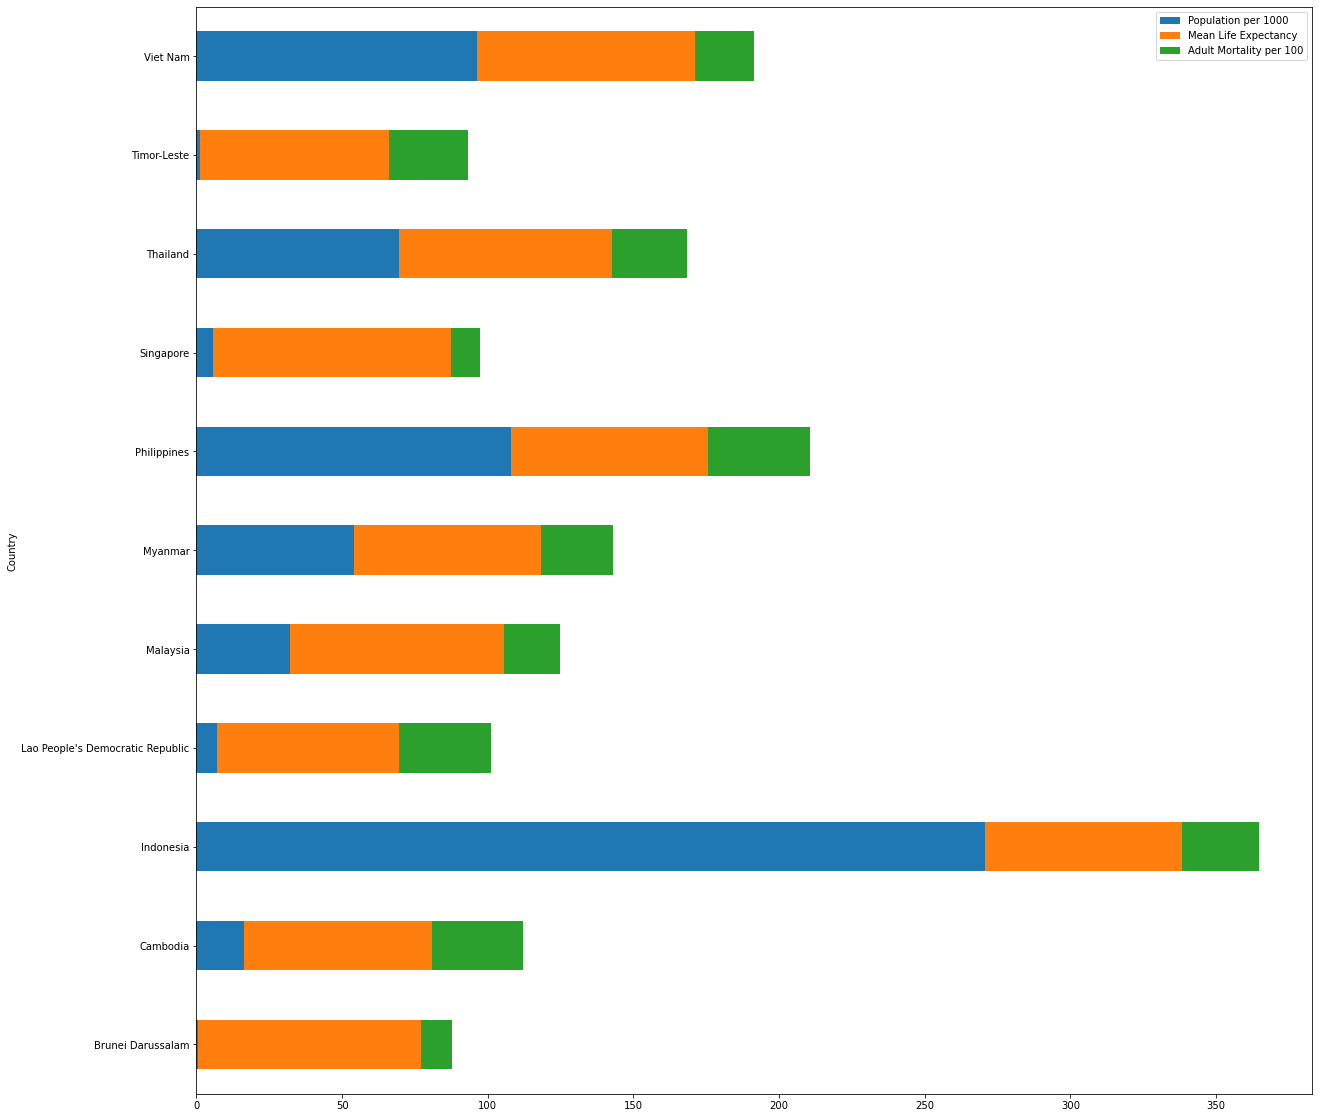

In [48]:
merged_df.plot.barh(
    x='Country', 
    y=['Population per 1000', 'Mean Life Expectancy', 'Adult Mortality per 100'], 
    figsize=(20,20), 
    stacked=True
)
plt.show()

The data used for the graph may be misleading because there's a large disparity in the data for Population between the countries.

Some countries with a lower population have similar adult mortality to those with a much high population. 

## Question 3


#### Approach: I will first extract the data regarding Singapore then use it to plot the line graphs. For the second line graph, I will need to create a legend for improved visualisation

#### Recall non-aggregated data from "LifeExpectancyData-v2.csv" 

In [49]:
led_df

,Country,Year,Status,Life Expectancy,Infant Deaths,Adult Mortality,BMI,Alcohol Consumption,Hepatitis B,Measles,Polio,HIV/AIDS,HIV/AIDS,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,27,723.0,27.1,4.36,68.0,31,67.0,65.0,33.6,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,26,715.0,26.7,4.06,7.0,998,7.0,68.0,36.7,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,25,73.0,26.3,4.43,73.0,304,73.0,71.0,39.8,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,25,686.0,25.9,1.72,76.0,529,76.0,75.0,42.1,0.427,9.8


#### Extract data related to Singapore

In [50]:
sing_df = led_df[led_df['Country']=='Singapore'].reset_index()
sing_df

,index,Country,Year,Status,Life Expectancy,Infant Deaths,Adult Mortality,BMI,Alcohol Consumption,Hepatitis B,Measles,Polio,HIV/AIDS,HIV/AIDS,Income Composition of Resources,Schooling
0,2313,Singapore,2015,Developed,83.1,0,55.0,33.2,1.79,96.0,0,96.0,96.0,0.1,0.924,15.4
1,2314,Singapore,2014,Developed,82.9,0,56.0,32.9,1.83,96.0,0,96.0,96.0,0.1,0.922,15.4
2,2315,Singapore,2013,Developed,82.7,0,57.0,32.7,1.83,97.0,138,97.0,97.0,0.1,0.920,15.4
3,2316,Singapore,2012,Developed,82.5,0,59.0,32.4,1.89,97.0,42,97.0,97.0,0.1,0.917,15.4
4,2317,Singapore,2011,Developed,82.2,0,6.0,32.1,1.80,96.0,148,96.0,96.0,0.1,0.911,15.2
5,2318,Singapore,2010,Developed,82.0,0,61.0,31.8,1.84,96.0,50,96.0,96.0,0.1,0.889,14.5
6,2319,Singapore,2009,Developed,81.7,0,62.0,31.5,1.73,96.0,16,97.0,97.0,0.1,0.887,14.4
7,2320,Singapore,2008,Developed,81.4,0,64.0,31.2,1.70,97.0,18,97.0,97.0,0.1,0.880,14.2
8,2321,Singapore,2007,Developed,81.1,0,65.0,3.9,1.60,96.0,15,97.0,97.0,0.1,0.873,14.1
9,2322,Singapore,2006,Developed,87.0,0,66.0,3.5,1.55,95.0,23,95.0,95.0,0.1,0.839,13.9


#### Plot a line graph on Life Expectancy over Time

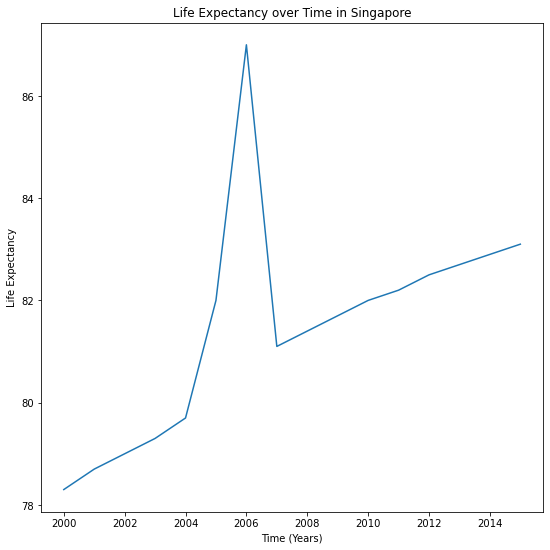

In [51]:
plt.figure(figsize=(9,9))
plt.plot(sing_df['Year'], sing_df['Life Expectancy'])
plt.title('Life Expectancy over Time in Singapore')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectancy')
plt.show()

From the result of the graph plotted, I can conclude that the graph would be quite useful in calculating the rate of increase in life expectancy over time as long as the large outlier in the year 2006 is ignored.

#### Plot a line graph of Adult Mortality and Infant Deaths over Time

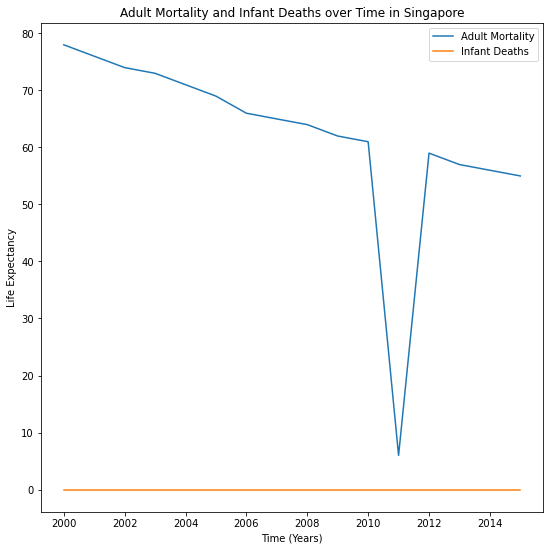

In [52]:
plt.figure(figsize=(9,9))
plt.plot(sing_df['Year'], sing_df['Adult Mortality'], label='Adult Mortality')
plt.plot(sing_df['Year'], sing_df['Infant Deaths'], label='Infant Deaths')
plt.legend(loc='upper right')
plt.title('Adult Mortality and Infant Deaths over Time in Singapore')
plt.xlabel('Time (Years)')
plt.ylabel('Life Expectancy')
plt.show()

From the result of the graph plotted, I can conclude that the graph would be useful to calculate the decreasing rate of adult mortality over time as long as the outlier in the year 2011 is ignored. This graph would also be useful in the circumstance that the average infant deaths per year needs to be calculated.

The greater the number of infant mortality, the lower the life expectancy. Life expectancy will decrease or increase in accordance with whether the adult passess away at an age lower or greater than the average life expectancy

_______________________________________________________________________________________________________________________________
# Conclusion
_______________________________________________________________________________________________________________________________

In conclusion, what I can draw from what I've done in this assignment is that there are generally many different ways to approach data and many different ways to visualise it. Data is quite difficult to handle due to possible discrepancies in the data and the various possible data types present that a programmer would have to work with. However, the availability of the many different types of graphs makes presenting data a much more fun and interactive experience.